# Generalized linear model with Poission family(Stats model)

In [121]:
# importing libraries
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# importing dataset 
dfday = pd.read_csv(r"E:\DS workspace\ML DL Python\aca tor dataset\bike sharing\day.csv")
# Curating dataset
dfday = dfday.drop(columns={"instant","season","yr","mnth","weekday","workingday","casual","registered"})
dfday = dfday.rename(columns={'dteday':'date','weathersit':'weather','hum':'humidity','cnt':'count'})
dfday['date']=pd.to_datetime(dfday.date)
dfday.head()
df = dfday.copy()
# Feature engineering
df['date'] = pd.to_datetime(df.date)
df['Month']=df['date'].dt.month
df['Day_of_week'] = df["date"].dt.dayofweek
df['Day']=df['date'].dt.day
df.head()

#Create the training and testing data sets.
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

# Patsy expression
expr = """count ~ Day  + Day_of_week + Month + temp + atemp + humidity + windspeed + weather + holiday """

#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['count']

print("GLM model with Poisson family",r2_score(predicted_counts, y_test))

Training data set length=589
Testing data set length=142
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  589
Model:                            GLM   Df Residuals:                      579
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4010e+05
Date:                Mon, 27 Feb 2023   Deviance:                   2.7423e+05
Time:                        17:50:50   Pearson chi2:                 2.65e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [118]:
#from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

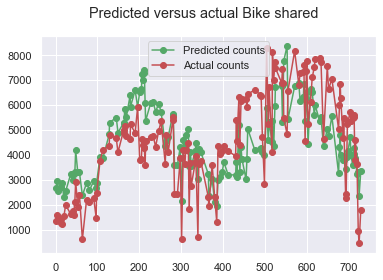

<Figure size 432x288 with 0 Axes>

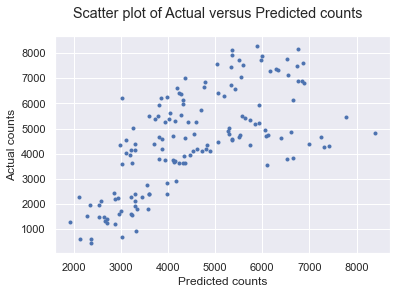

In [119]:
#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual Bike shared')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')

plt.show()

# Time series forcasting

In [42]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [53]:
dfhour = pd.read_csv(r"E:\DS workspace\ML DL Python\aca tor dataset\bike sharing\hour.csv")
dfhour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [54]:
dft = dfhour[["dteday","cnt"]]
dft = dft.rename(columns={"dteday":"date","cnt":"count"})
dft.head()                

,date,count
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32
3,2011-01-01,13
4,2011-01-01,1


In [55]:
dft = dft.groupby('date')['count'].sum().reset_index()

In [56]:
dft['date'] = pd.to_datetime(dft['date'])
dft.set_index('date', inplace=True)
dft.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='date', length=731, freq=None)

Text(0.5, 0, 'Year')

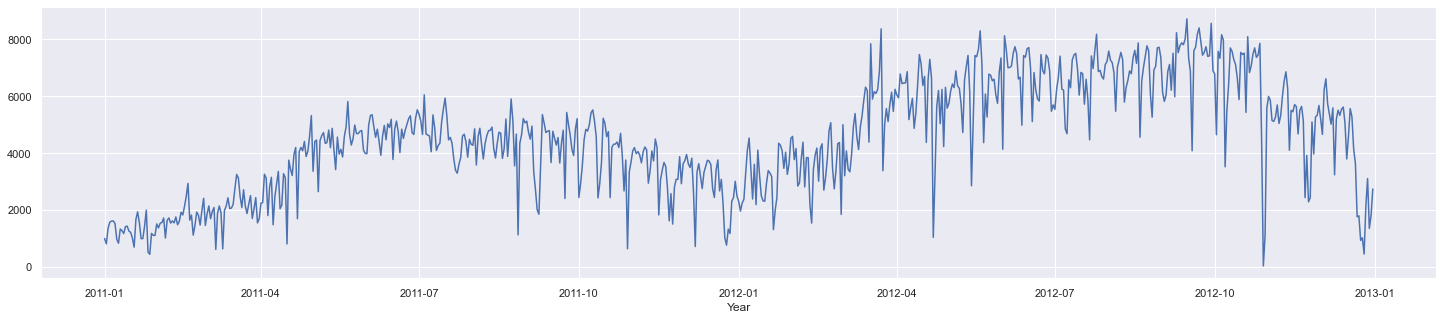

In [57]:
fig = plt.figure(figsize=(25,5))
plt.plot(dft)
plt.xlabel("Year")

In [58]:
data = dft['count'].resample('MS').mean()

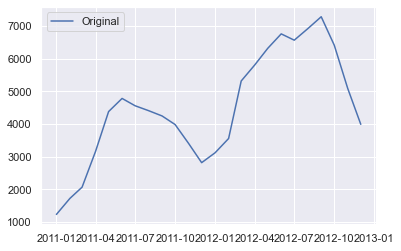

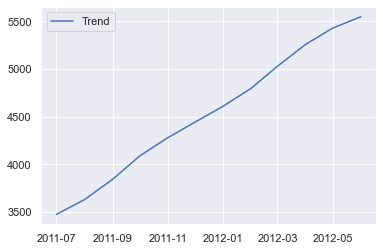

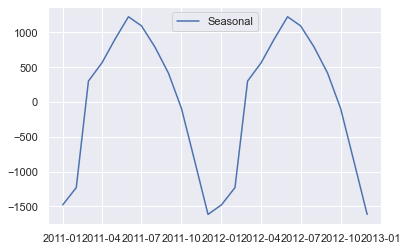

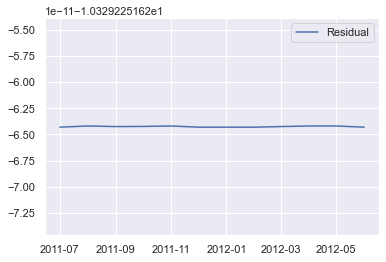

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

* ADFuller test

In [37]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [38]:
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.493364
p-value                         0.117097
#Lags Used                      1.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


* **The test statistic > critical value, Hence we accept the null hypothesis which implies that the series is  not stationary**

# KPSS test

In [39]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c',nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [40]:
kpss_test(data)

Results of KPSS Test:
Test Statistic           0.376657
p-value                  0.087217
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


**The test statistic < critical value, we reject the null hypothesis which implies that the series is  not stationary**

# ARIMA MODEL for Forecasting

In [64]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 2)
SARIMAX: (0, 0, 1) x (0, 1, 0, 2)
SARIMAX: (0, 1, 0) x (0, 1, 1, 2)
SARIMAX: (0, 1, 0) x (1, 0, 0, 2)


In [65]:
size = int(len(data) * 0.95)
train, test = data[0:size], data[size:len(data)]
test.head()

date
2012-11-01    5088.800000
2012-12-01    3990.741935
Freq: MS, Name: count, dtype: float64

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}2 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 2)2 - AIC:418.6574060450816
ARIMA(0, 0, 0)x(0, 0, 1, 2)2 - AIC:369.76845377568037
ARIMA(0, 0, 0)x(0, 1, 0, 2)2 - AIC:324.285350109061
ARIMA(0, 0, 0)x(0, 1, 1, 2)2 - AIC:284.2397117055199
ARIMA(0, 0, 0)x(1, 0, 0, 2)2 - AIC:340.8575809385475
ARIMA(0, 0, 0)x(1, 0, 1, 2)2 - AIC:322.5955681107986
ARIMA(0, 0, 0)x(1, 1, 0, 2)2 - AIC:305.454895707337
ARIMA(0, 0, 0)x(1, 1, 1, 2)2 - AIC:284.8952564285696
ARIMA(0, 0, 1)x(0, 0, 0, 2)2 - AIC:376.15695195674016
ARIMA(0, 0, 1)x(0, 0, 1, 2)2 - AIC:321.3264005169973
ARIMA(0, 0, 1)x(0, 1, 0, 2)2 - AIC:290.54491588808696
ARIMA(0, 0, 1)x(0, 1, 1, 2)2 - AIC:256.70969161840327
ARIMA(0, 0, 1)x(1, 0, 0, 2)2 - AIC:324.5616792655323
ARIMA(0, 0, 1)x(1, 0, 1, 2)2 - AIC:292.16644176587414
ARIMA(0, 0, 1)x(1, 1, 0, 2)2 - AIC:291.49069330379365
ARIMA(0, 0, 1)x(1, 1, 1, 2)2 - AIC:255.7636886613224
ARIMA(0, 1, 0)x(0, 0, 0, 2)2 - AIC:318.9989660091262
ARIMA(0, 1, 0)x(0, 0, 1, 2)2 - AIC:285.74056276936574
ARIMA(0, 1, 0)x(0, 1, 0, 2)2 - AIC:294.11

In [69]:
min_val = aic_list.index(min(aic_list))
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

In [70]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4701      0.453      1.037      0.300      -0.418       1.359
ma.S.L2       -0.9982     30.014     -0.033      0.973     -59.824      57.828
sigma2      3.382e+05   1.02e+07      0.033      0.973   -1.96e+07    2.03e+07


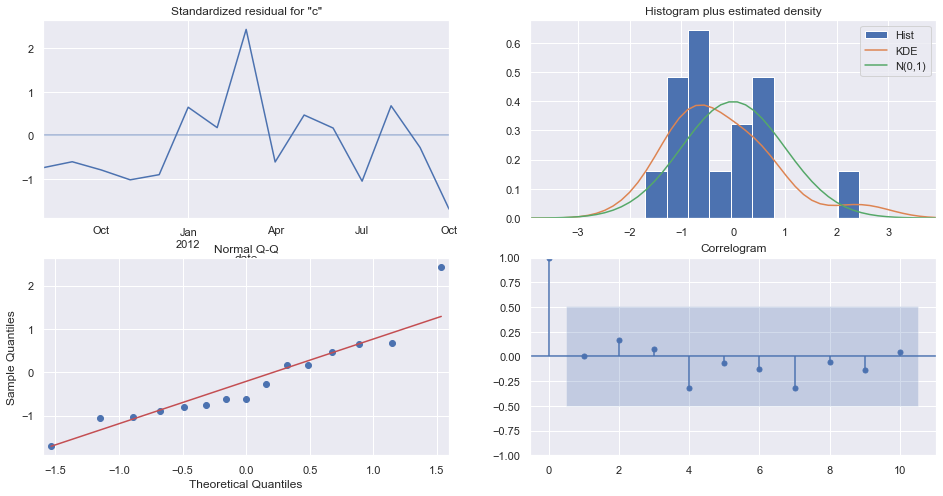

In [71]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

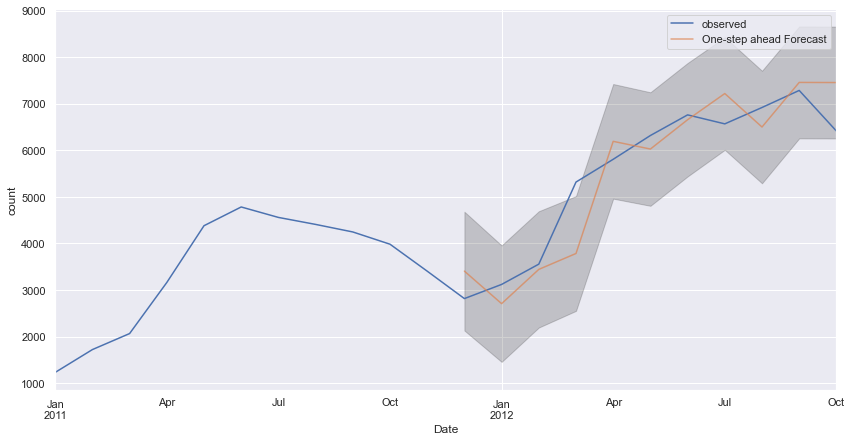

In [108]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2011-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('count')
plt.legend()
plt.show()

In [103]:
y_forecasted = pred.predicted_mean
y_truth = train['2011-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 538482.98
The Root Mean Squared Error of our forecasts is 733.81


In [96]:
y_forecasted

date
2011-01-01       0.000000
2011-02-01    1231.903226
2011-03-01    2576.555973
2011-04-01    2479.533566
2011-05-01    3628.466935
2011-06-01    5520.268368
2011-07-01    5296.129022
2011-08-01    4942.934846
2011-09-01    4658.929874
2011-10-01    4520.999953
2011-11-01    4074.289154
2011-12-01    3406.412718
2012-01-01    2707.949797
2012-02-01    3443.629736
2012-03-01    3785.144733
2012-04-01    6192.847393
2012-05-01    6027.418785
2012-06-01    6656.914009
2012-07-01    7218.997154
2012-08-01    6500.268633
2012-09-01    7457.804037
2012-10-01    7455.122349
Freq: MS, Name: predicted_mean, dtype: float64

# Visualizing the Forecast 

            lower count   upper count
2012-11-01  5083.940220   7473.847114
2012-12-01  4302.314956   8538.073821
2013-01-01  3911.796826   9538.525472
2013-02-01  3475.987684  10256.936056
2013-03-01  3240.855526  11102.001735
2013-04-01  2890.906623  11734.552081
2013-05-01  2715.542683  12519.849542
2013-06-01  2405.768596  13112.225071
2013-07-01  2262.225499  13865.701689
2013-08-01  1975.580510  14434.948121
2013-09-01  1851.656820  15168.805332
2013-10-01  1579.878832  15723.184763
2013-11-01  1469.143686  16443.853430


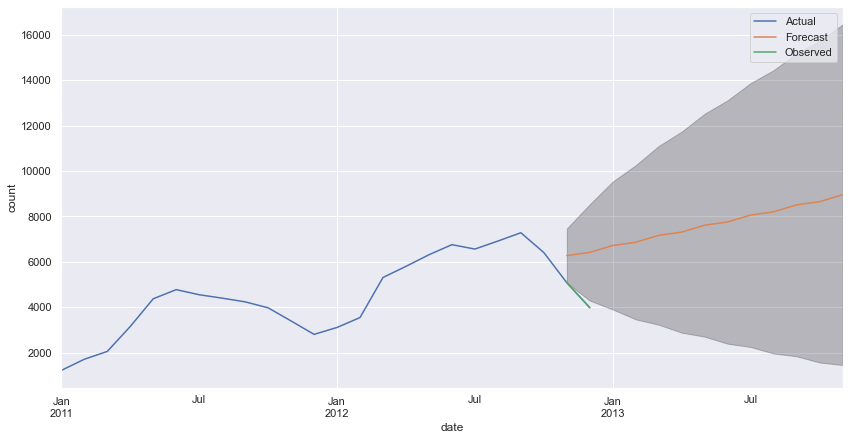

In [104]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('count')
test.plot(label = "Observed")
print(pred_ci)
plt.legend(loc = "best")
plt.show()

In [106]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper count']
Result

,Actual,Predicted
date,,
2012-11-01,5088.800000,7473.847114
2012-12-01,3990.741935,8538.073821


In [107]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper count']
Result
mse = ((Result['Actual'] - Result['Predicted']) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 13183338.51
The Root Mean Squared Error of our forecasts is 3630.89


# The time series forcast model is not efficent due to nature of seasonality.